In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

In [ ]:
# Image("image.png")

In [ ]:
data = pd.read_excel("data.xlsx")

In [ ]:
data.head()

,I,F,F0,_,U34_1,I1,_.1,U34_2,I2,_.2,U34_3,I3,_.3,U34_4,I4,_.4,U34_5,I5,_.5,U34_6,I6,_.6,U34_7,I7,_.7,U34_r,Ir
0,0.21,3.5,2.40,NaN,76,0.21,NaN,111.0,0.20,NaN,150,0.20,NaN,174.0,0.20,NaN,200.0,0.21,NaN,223.0,0.19,NaN,246.0,0.20,NaN,123.0,0.09
1,0.40,4.5,2.40,NaN,96,0.39,NaN,145.0,0.38,NaN,173,0.30,NaN,225.0,0.38,NaN,261.0,0.39,NaN,303.0,0.42,NaN,326.0,0.40,NaN,82.0,0.21
2,0.61,5.6,2.20,NaN,122,0.62,NaN,181.0,0.60,NaN,200,0.42,NaN,263.0,0.53,NaN,320.0,0.60,NaN,363.0,0.61,NaN,400.0,0.60,NaN,42.0,0.31
3,0.80,6.5,2.20,NaN,129,0.70,NaN,208.0,0.79,NaN,220,0.50,NaN,287.0,0.63,NaN,369.0,0.78,NaN,421.0,0.80,NaN,464.0,0.80,NaN,4.0,0.43
4,0.99,7.4,2.15,NaN,137,0.79,NaN,233.0,1.01,NaN,243,0.61,NaN,312.0,0.73,NaN,414.0,1.00,NaN,467.0,1.00,NaN,519.0,1.01,NaN,-32.0,0.52


In [ ]:
SN = 75 * 1e-4

In [ ]:
print((data).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &     I &     F &    F0 &   \_ &  U34\_1 &    I1 &  \_.1 &  U34\_2 &    I2 &  \_.2 &  U34\_3 &    I3 &  \_.3 &  U34\_4 &    I4 &  \_.4 &  U34\_5 &    I5 &  \_.5 &  U34\_6 &    I6 &  \_.6 &  U34\_7 &    I7 &  \_.7 &  U34\_r &    Ir \\
\midrule
0  &  0.21 &  3.50 &  2.40 & NaN &     76 &  0.21 &  NaN &  111.0 &  0.20 &  NaN &    150 &  0.20 &  NaN &  174.0 &  0.20 &  NaN &  200.0 &  0.21 &  NaN &  223.0 &  0.19 &  NaN &  246.0 &  0.20 &  NaN &  123.0 &  0.09 \\
1  &  0.40 &  4.50 &  2.40 & NaN &     96 &  0.39 &  NaN &  145.0 &  0.38 &  NaN &    173 &  0.30 &  NaN &  225.0 &  0.38 &  NaN &  261.0 &  0.39 &  NaN &  303.0 &  0.42 &  NaN &  326.0 &  0.40 &  NaN &   82.0 &  0.21 \\
2  &  0.61 &  5.60 &  2.20 & NaN &    122 &  0.62 &  NaN &  181.0 &  0.60 &  NaN &    200 &  0.42 &  NaN &  263.0 &  0.53 &  NaN &  320.0 &  0.60 &  NaN &  363.0 &  0.61 &  NaN &  400.0 &  0.60 &  NaN &   42.0 &  0.31 \\
3  &  0.80 &  6.50 &  2.20 & NaN &  

In [ ]:
I_em = data["I"].dropna(0)
F_em = data["F"].dropna(0)
F_em_0 = data["F0"].dropna(0)

## Функции

In [ ]:
def viz_lab_plot(x, y, xerr, yerr, x_label, y_label, name='', dpi=100, label=u'эксп.'):
    fig, ax = plt.subplots(dpi=dpi)
    font = {'fontname': 'Times New Roman'}

    # Подписи:
    ax.set_xlabel(x_label, **font)
    ax.set_ylabel(y_label, **font)

    # Сетка:
    ax.minorticks_on()
    ax.grid(True)
    ax.grid(which='major', linestyle = ':')
    ax.grid(which='minor', linestyle = ':')

    # Погрешность + точки:
    plt.errorbar(x, y, fmt='.k', ecolor='gray', 
                 xerr=xerr, yerr=yerr, label=u'эксп.')

## Градуировка электромагнита

In [ ]:
coef_em, res_em, _, _, _ = np.polyfit(I_em, (F_em - F_em_0)/40, 3, full=True)
f_em = np.poly1d(coef_em)
coef_em

array([-0.03208363,  0.03734211,  0.12395808,  0.00127808])

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


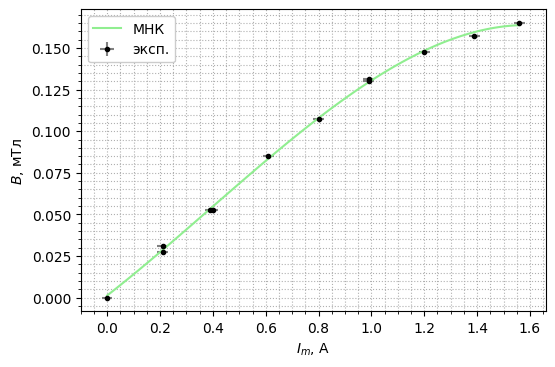

In [ ]:
X = np.linspace(0, max(I_em), 100)
err_base = np.ones(I_em.shape[0]+1)
viz_lab_plot([0]+list(I_em), [0]+list((F_em - F_em_0)/40),
             err_base*0.02, 
             0,
             r"$I_m$, А", 
             r"$B$, мТл", 
             name='', dpi=100)
plt.plot(X, f_em(X), color="lightgreen", label="МНК")

# Легенда:
matplotlib.rcParams["legend.framealpha"] = 1
plt.legend(loc='best')

plt.savefig("test.svg")
plt.show()

## Измерение ЭДС Холла

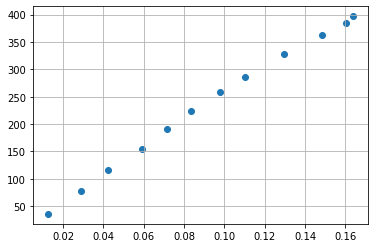

In [ ]:
data = pd.read_excel("data.xlsx")
x = f_em(data["Ir"])
y = -(data["U34_r"]-159)
plt.scatter(x, y)
plt.grid()
plt.show()

## Постобработка

In [ ]:
I_30   = data["I1"]
U_30   = data["U34_1"]
U_0_30 = 50

I_45   = data["I2"]
U_45   = data["U34_2"]
U_0_45 = 78

I_60   = data["I3"]
U_60   = data["U34_3"]
U_0_60 = 104

I_70   = data["I4"]
U_70   = data["U34_4"]
U_0_70 = 122

I_80   = data["I5"]
U_80   = data["U34_5"]
U_0_80 = 139

I_90   = data["I6"]
U_90   = data["U34_6"]
U_0_90 = 157

I_10   = data["I7"]
U_10   = data["U34_7"]
U_0_10 = 174

In [ ]:
Is = [I_30, I_45, I_60, I_70, I_80, I_90, I_10]
Us = [U_30, U_45, U_60, U_70, U_80, U_90, U_10]
U_0s = [U_0_30, U_0_45, U_0_60, U_0_70, U_0_80, U_0_90, U_0_10]

In [ ]:
coefs = [0 for i in range(7)]
ress = [0 for i in range(7)]
fs = [0 for i in range(7)]

colormap = plt.cm.summer
colors = [colormap(i) for i in np.linspace(0, 0.7, 7)]
I0s = [0.3, 0.45, 0.6, 0.7, 0.8, 0.9, 1.0]

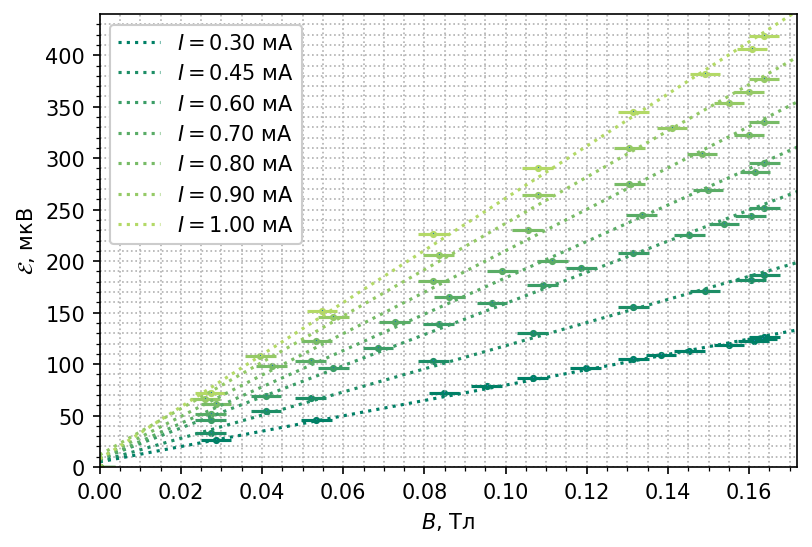

In [ ]:
fig, ax = plt.subplots(dpi=150)
font = {'fontname': 'Times New Roman'}

# Подписи:
ax.set_xlabel("$B$, Тл", **font)
ax.set_ylabel("$\mathcal{E}$, мкВ", **font)

# Сетка:
ax.minorticks_on()
ax.grid(True)
ax.grid(which='major', linestyle = ':')
ax.grid(which='minor', linestyle = ':')

for i in range(7):
    # МНК:
    x = f_em(Is[i].dropna())
    y = (Us[i]-U_0s[i]).dropna()
    
    x = [0] + list(x)
    y = [0] + list(y)
    
    coefs[i], ress[i], _, _, _ = np.polyfit(x, y, 1, full=True)
    fs[i] = np.poly1d(coefs[i])
    
    # Погрешность + точки:
    X = np.linspace(0, 6.6, 100)
    err_base = np.ones(len(x))
    plt.errorbar(x, y, fmt= ",", ecolor=colors[i], 
                 xerr=f_em(err_base*0.02), yerr=err_base*2, label='')
    plt.scatter(x, y, color=colors[i], s=6)
    
    # Аппроксимация:
    plt.plot(X, fs[i](X), ":", label="$I = {:.2f}$ мА".format(I0s[i]), color=colors[i])
    
# x = f_em(data["Ir"])
# y = -(data["U34_r"]-159)
# plt.scatter(x, y, color="grey", s=6)

# Легенда:
matplotlib.rcParams["legend.framealpha"] = 1
plt.legend(loc='best')

plt.xlim(0, 1.05*max(x))
plt.ylim(0, 1.05*max(y))
plt.show()

In [ ]:
Ks = np.array([coefs[i][0] for i in range(len(coefs))]) / 1e6
I0s

[0.3, 0.45, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
coef_k, res_k, _, _, _ = np.polyfit(I0s, Ks, 1, full=True)
f_k = np.poly1d(coef_k)

In [ ]:
errs = [ress[i][0]**0.5 / len(Is[i].dropna()) for i in range(len(Is))]

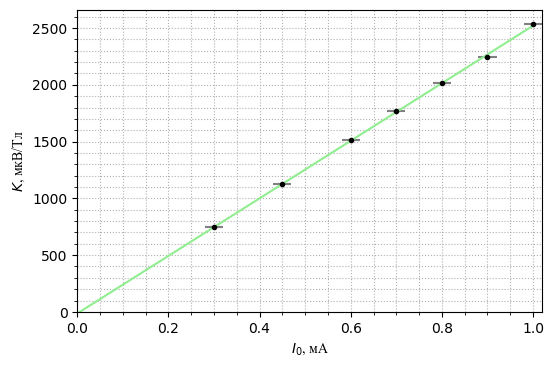

In [ ]:
err_base = np.ones(len(Ks))
X = np.linspace(0, 1, 100)
viz_lab_plot(I0s, Ks*1e6,
             err_base * 0.02,
             errs,
             r"$I_0$, мА", 
             r"$K$, мкВ/Тл", 
             name='', dpi=100)
plt.plot(X, f_k(X)*1e6, color="lightgreen", label="МНК")
# plt.plot(X, X * coef_k[0] * 1.035 * 1e6, color="lightgreen", label="МНК")
# plt.plot(X, X * coef_k[0] * 0.965 * 1e6, color="lightgreen", label="МНК")

plt.xlim(0, 1.02)
plt.ylim(0, max(Ks)*1.05*1e6)
plt.show()

In [ ]:
tan = coef_k[0] * 1000

In [ ]:
2.2 * 1e-3 * tan * 1e3

5.57617938962465

In [ ]:
Rx = a * tan
Rx * 1e3, Rx * 0.035 * 1e3

(5.57617938962465, 0.19516627863686278)

In [ ]:
ee = 1.6 * 1e-19

In [ ]:
n = 1 / ee / Rx
n/1e21, n * 0.035 / 1e21

(1.1208391199947938, 0.03922936919981779)

In [ ]:
L35 = 6 * 1e-3
U35 = 2.59 * 1e-3
l = 7 * 1e-3
a = 2.2 * 1e-3
I = 1 * 1e-3

In [ ]:
I * L35 / U35 / a / l

150.4287218572933